# 1. 시계열 데이터(Time Series Data) 분석을 위한 판다스 Expanding and Rolling 이해하기

## 1-1) rolling

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline  
# 이거를 해줘야지 pc상에서 표시가 된다.

In [3]:
# 표준정규분포에서 1000개의 수 랜덤 추출, 2017/1/1일부터 1000일의 데이터를 인덱스로
s= pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2017', periods=1000))

s.head()

2017-01-01   -0.877169
2017-01-02   -1.079161
2017-01-03    1.224455
2017-01-04   -0.511920
2017-01-05   -0.886180
Freq: D, dtype: float64

<AxesSubplot:>

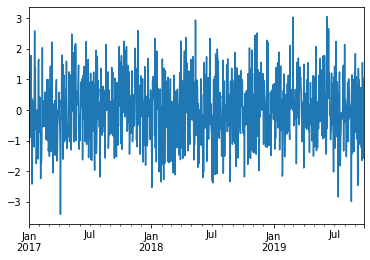

In [4]:
s.plot()

<AxesSubplot:>

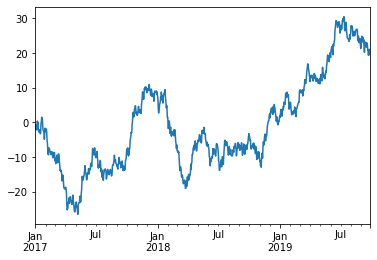

In [6]:
s1=s.cumsum() 
# 다 더해줘서 누적합들의 그레프를 출력해봤다.
s1.plot()

### rolling : 이동평균 구할 때 사용

In [8]:
# 데이터들을 60개씩 이동평균 구하기
r= s1.rolling(window=60) # window : 몇 개씩 연산할지
r.mean()
# 앞에 60개 미만의 데이터 들은 NaN으로 표시됨. 60개 이상이 되어야지 평균을 구할 수 있으므로

2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
                ...    
2019-09-23    24.153295
2019-09-24    24.114035
2019-09-25    24.050717
2019-09-26    23.980221
2019-09-27    23.905787
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

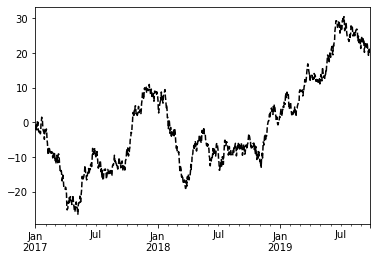

In [9]:
s1.plot(style='k--') # k-- : 점선그래프

<AxesSubplot:>

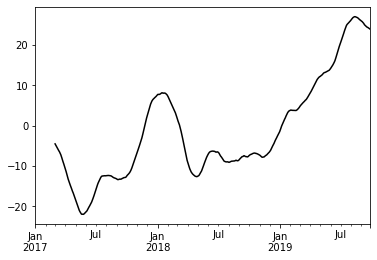

In [10]:
r.mean().plot(style='k')

<AxesSubplot:>

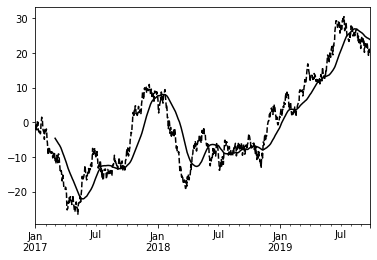

In [11]:
# 둘이 합치기
s1.plot(style='k--')
r.mean().plot(style='k')

## 1-2) rolling

In [12]:
df = pd.DataFrame(np.random.randn(1000,4),
                 index=pd.date_range('1/1/2017',periods=1000),
                 columns=['A','B','C','D'])

df

,A,B,C,D
2017-01-01,1.175286,0.093065,-0.089795,-0.856148
2017-01-02,0.433489,-0.670562,-0.948997,1.825081
2017-01-03,0.624988,2.283252,-0.505293,-0.602794
2017-01-04,-2.131542,0.903492,2.943583,-0.982495
2017-01-05,-0.610320,0.168205,0.591515,-0.615931
...,...,...,...,...
2019-09-23,-1.027387,-0.025493,-1.767825,0.293806
2019-09-24,0.178753,-1.853038,-0.283788,1.924268
2019-09-25,0.031516,0.667626,1.050750,1.458326
2019-09-26,1.340622,-2.294151,-0.737031,-0.492607


<AxesSubplot:>

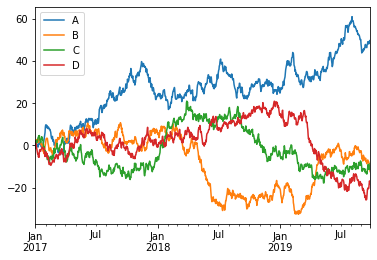

In [13]:
df1= df.cumsum()

df1.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

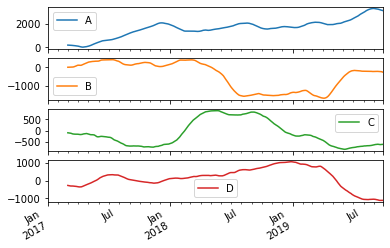

In [14]:
# 60일씩의 이동평균 구하고 그래프로 나타내기
df1.rolling(window=60).sum().plot(subplots=True)

<AxesSubplot:>

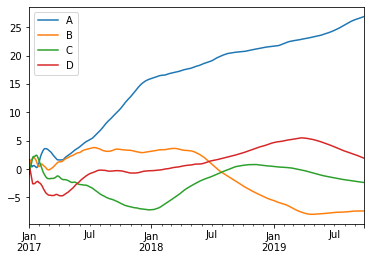

In [16]:
df1.rolling(window=len(df1), min_periods=1).mean().plot()

## 2-1) expanding

<AxesSubplot:>

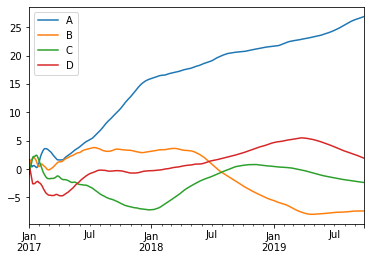

In [17]:
df1.expanding(min_periods=1).mean().plot()

<AxesSubplot:>

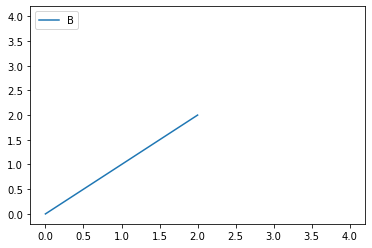

In [18]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})

dfe.plot()

In [20]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

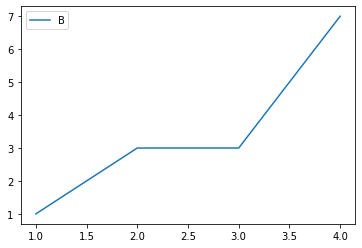

In [19]:
dfe.expanding(2).sum().plot()

#### ```
expanding(2)의 2는 min_periods 를 의미합니다. 
해당 내용은 최소 데이터 갯수를 몇 개로 window 사이즈를 지정할 것인지를 의미하는데 
여기에서는 2개 이상 있어야지 해당 값의 결과가 나오게 됩니다.```

```rolling 과의 차이점은 rolling은 윈도우가 이동하며 해당 구간의 평균이나 합을 구하지만 
expanding은 누적해서 값을 더하거나 평균을 구한다. (연산은 더하기, 평균 외에도 다양한 연산이 가능하긴 하다.)```

## 2. 파이썬 판다스로 Series 와 DataFrame 데이터 시각화 하기 소개

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [23]:
df = pd.DataFrame
df.plot?

In [31]:
ts= pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2000', periods=1000))

ts.head(30)

2000-01-01    1.007675
2000-01-02    0.196385
2000-01-03   -1.441450
2000-01-04    0.838261
2000-01-05   -0.059418
2000-01-06   -1.553003
2000-01-07   -0.582728
2000-01-08    0.979011
2000-01-09    0.758057
2000-01-10    0.445119
2000-01-11    0.090260
2000-01-12    1.069730
2000-01-13   -0.557243
2000-01-14    2.139664
2000-01-15   -0.985856
2000-01-16   -1.282975
2000-01-17    0.432988
2000-01-18   -0.090075
2000-01-19   -1.816448
2000-01-20    0.341192
2000-01-21    0.885758
2000-01-22   -0.958931
2000-01-23    0.083341
2000-01-24    1.634782
2000-01-25   -1.090280
2000-01-26    0.228360
2000-01-27   -0.329848
2000-01-28    0.106933
2000-01-29   -0.270252
2000-01-30   -0.862625
Freq: D, dtype: float64

<AxesSubplot:>

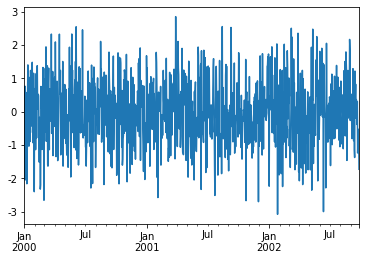

In [25]:
ts.plot()

In [32]:
ts = ts.cumsum()

<AxesSubplot:>

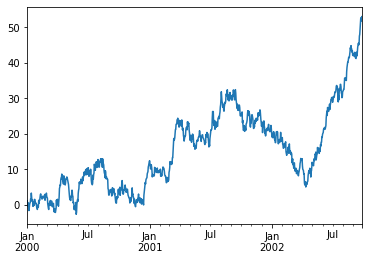

In [33]:
ts.plot()

In [34]:
df= pd.DataFrame(np.random.randn(1000,4),
            index=ts.index,columns=['A', 'B', 'C', 'D'])

df.head(30)

,A,B,C,D
2000-01-01,-0.209858,-0.599054,-0.207888,0.802037
2000-01-02,-2.443950,-1.180974,1.687738,-0.573452
2000-01-03,1.638128,1.918591,1.402782,0.270357
2000-01-04,-0.742165,0.756918,0.786002,-0.373804
2000-01-05,-0.502535,0.007295,-1.400785,-0.393789
2000-01-06,0.347740,0.089439,-0.682542,0.101544
2000-01-07,-0.594924,-2.483916,0.165236,1.520801
2000-01-08,0.327817,-0.651922,-0.190799,-1.477681
2000-01-09,0.348972,0.379347,-0.372356,-0.175813
2000-01-10,0.479393,1.104388,-1.792269,0.387478


<AxesSubplot:>

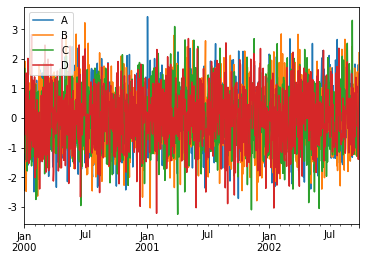

In [35]:
df.plot()

In [37]:
df = df.cumsum()

<AxesSubplot:>

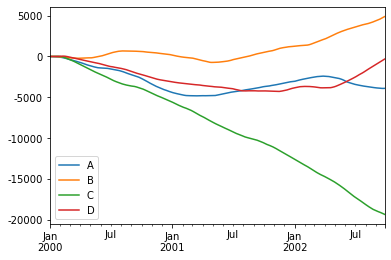

In [38]:
df.plot()

In [39]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns = ['B', 'C'])
df3

,B,C
0,0.518101,-0.766188
1,-0.504011,0.026634
2,-0.968196,1.146183
3,-0.484466,-1.034579
4,-0.268607,1.133488
...,...,...
995,0.626400,-0.359570
996,-0.138003,1.133061
997,0.399073,0.283264
998,0.491767,-0.536876


In [41]:
df3 = df3.cumsum()

In [43]:
df3.head(30)

,B,C
0,0.518101,-0.766188
1,0.532191,-1.505741
2,-0.421915,-1.099111
3,-1.860487,-1.727061
4,-3.567666,-1.221522
5,-5.359293,-1.855348
6,-5.762396,-1.414631
7,-6.577082,-2.466596
8,-6.801905,-2.770088
9,-6.722271,-2.193921


In [46]:
df3['A'] = pd.Series(list(range(len(df3))))
df3.head()

,B,C,A
0,0.518101,-0.766188,0
1,0.532191,-1.505741,1
2,-0.421915,-1.099111,2
3,-1.860487,-1.727061,3
4,-3.567666,-1.221522,4


<AxesSubplot:xlabel='A'>

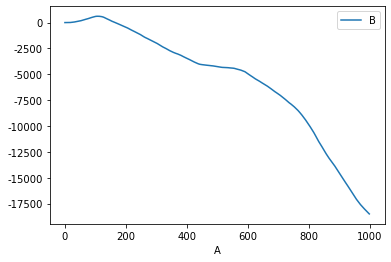

In [47]:
df3.plot(x='A', y='B')

## 3.파이썬 데이터 시각화 판다스로 bar plot 막대그래프 그리기

In [48]:
df.iloc[5]

A    -9.810209
B     0.549948
C    11.676382
D     1.218951
Name: 2000-01-06 00:00:00, dtype: float64

<AxesSubplot:>

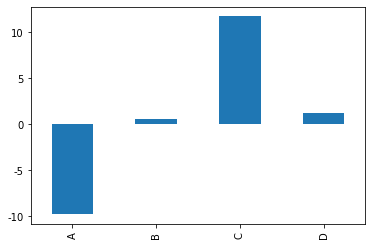

In [50]:
df.iloc[5].plot(kind = 'bar')

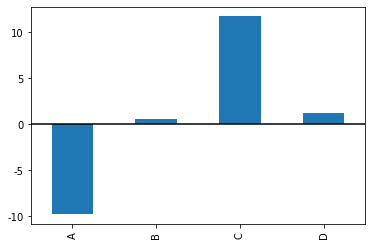

In [52]:
df.iloc[5].plot.bar() # 위랑 같음
plt.axhline(0, color='k') # 가로축 그려줌

<AxesSubplot:>

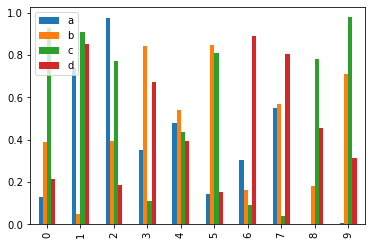

In [54]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()

<AxesSubplot:>

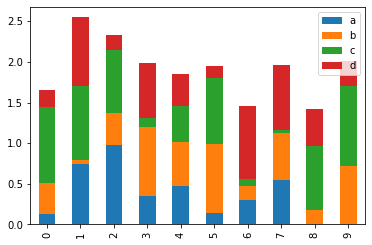

In [55]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

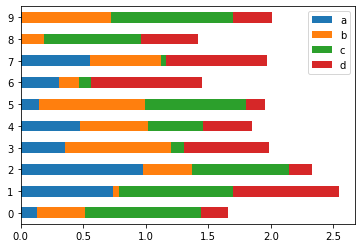

In [57]:
df2.plot.barh(stacked = True) # barh : x축과 y축이 바뀜, 옆으로 뉜 모양

## 4. 파이썬 데이터 시각화 히스토그램과 도수분포표 이해하기, 막대그래프 vs 히스토그램 차이점 이해하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [5]:
df4 = pd.DataFrame({'a': np.random.randn(1000)+1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000)-1})
df4.head()

,a,b,c
0,1.465189,-0.570770,-1.448832
1,3.163238,-0.550523,0.382534
2,1.389003,0.963003,-1.616208
3,-0.358047,1.658412,-1.403248
4,1.767207,1.144551,-2.396553


<AxesSubplot:ylabel='Frequency'>

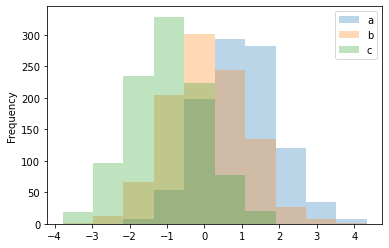

In [6]:
df4.plot.hist(alpha=0.3) # alpha : 투명도

<AxesSubplot:ylabel='Frequency'>

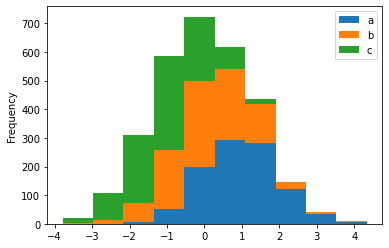

In [7]:
df4.plot.hist(stacked=True)

### bins는 구간을 쪼개는 갯수를 의미

<AxesSubplot:ylabel='Frequency'>

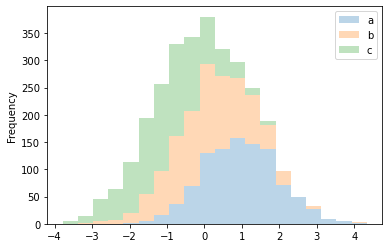

In [10]:
df4.plot.hist(stacked = True, bins=20, alpha = 0.3)

<AxesSubplot:ylabel='Frequency'>

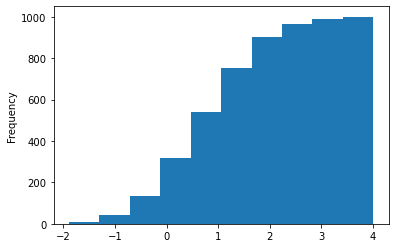

In [12]:
df4['a'].plot.hist(cumulative=True) # cumulative : 누적해서 쌓아올림

<AxesSubplot:xlabel='Frequency'>

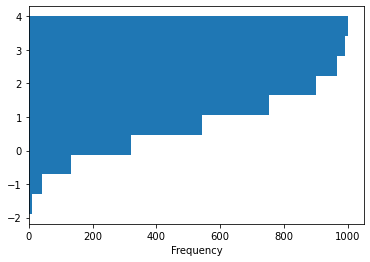

In [13]:
df4['a'].plot.hist(cumulative=True, orientation = "horizontal") # horizontal : x축과 y축이 바뀜

## 5. 파이썬 판다스로 차분(차이 값)diff 값을 구하고 히스토그램으로 표현하기
* diff : 뒤에 값 - 앞에 값 

In [17]:
df4['a']

0      1.465189
1      3.163238
2      1.389003
3     -0.358047
4      1.767207
         ...   
995    2.231113
996    0.204706
997    0.624837
998    1.591785
999    0.934623
Name: a, Length: 1000, dtype: float64

In [19]:
df4['a'].diff() # 연속되는 두 값의 차이를 구한다

0           NaN
1      1.698049
2     -1.774235
3     -1.747051
4      2.125254
         ...   
995   -0.210542
996   -2.026407
997    0.420131
998    0.966948
999   -0.657162
Name: a, Length: 1000, dtype: float64

<AxesSubplot:>

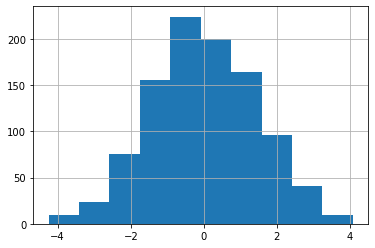

In [20]:
df4['a'].diff().hist()

In [21]:
df4['a_diff'] = df4['a'].diff()
df4.head()

,a,b,c,a_diff
0,1.465189,-0.570770,-1.448832,NaN
1,3.163238,-0.550523,0.382534,1.698049
2,1.389003,0.963003,-1.616208,-1.774235
3,-0.358047,1.658412,-1.403248,-1.747051
4,1.767207,1.144551,-2.396553,2.125254


In [22]:
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a'] - df4['a_shift']
df4[['a','a_shift','a_minus','a_diff']].head()

,a,a_shift,a_minus,a_diff
0,1.465189,NaN,NaN,NaN
1,3.163238,1.465189,1.698049,1.698049
2,1.389003,3.163238,-1.774235,-1.774235
3,-0.358047,1.389003,-1.747051,-1.747051
4,1.767207,-0.358047,2.125254,2.125254


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

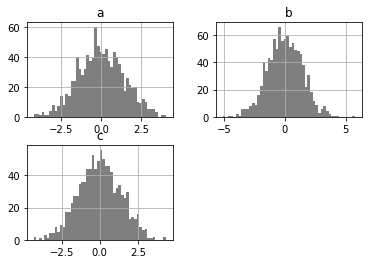

In [25]:
df4[['a','b','c']].diff().hist(color='k',alpha=0.5,bins=50)

In [26]:
data = pd.Series(np.random.randn(1000))
data

0     -0.140837
1     -0.427182
2      2.272384
3     -0.959569
4      0.458001
         ...   
995    1.435321
996    0.413864
997   -1.211856
998   -0.632640
999   -0.085372
Length: 1000, dtype: float64

<AxesSubplot:>

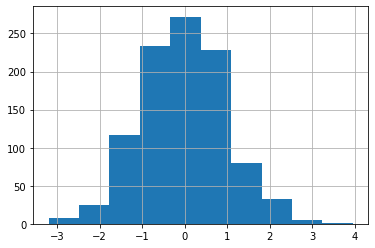

In [33]:
# figsize : (가로, 세로) 길이
data.hist(figsize=(6, 4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

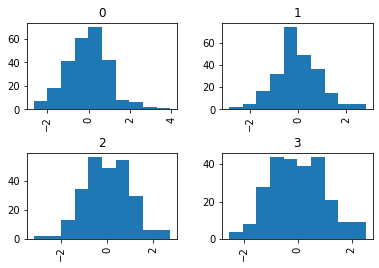

In [48]:
# np.random.randint(0, 10, size = 2) : 0부터 9까지 정수 2개 랜덤으로 뽑기
data.hist(by = np.random.randint(0, 4, 1000)) # 0부터 3까지 정수 1000개 랜덤으로 뽑고 이 값에 따라 히스토그램 그리기


In [53]:
np.random.randint(0, 4, 1000)

array([3, 1, 2, 2, 3, 1, 0, 1, 2, 3, 1, 2, 2, 3, 0, 3, 2, 2, 0, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 2, 1, 2, 3, 1, 3, 0, 1, 3, 1, 0, 1,
       2, 2, 2, 3, 0, 3, 0, 0, 3, 2, 2, 1, 3, 1, 1, 0, 0, 2, 0, 3, 1, 3,
       0, 3, 2, 2, 2, 3, 3, 0, 3, 3, 0, 2, 3, 0, 0, 3, 3, 0, 2, 0, 2, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 3, 1, 1, 0, 0, 3, 3, 1, 0, 1, 3, 2, 2, 3,
       3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 3, 1,
       0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 3, 3, 0, 2, 3, 0, 3,
       3, 3, 3, 0, 0, 2, 2, 0, 1, 3, 3, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2,
       1, 3, 2, 0, 3, 3, 3, 2, 3, 1, 0, 1, 1, 1, 2, 2, 0, 2, 3, 2, 2, 0,
       3, 3, 2, 3, 0, 3, 1, 0, 2, 1, 0, 0, 3, 2, 1, 2, 2, 3, 1, 3, 0, 3,
       0, 2, 3, 2, 2, 1, 0, 3, 3, 0, 3, 1, 3, 3, 0, 1, 2, 2, 3, 3, 1, 3,
       3, 0, 2, 1, 1, 2, 2, 0, 0, 3, 3, 0, 1, 0, 3, 2, 3, 2, 1, 0, 0, 0,
       3, 1, 3, 2, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 3, 3, 0, 1, 1, 1, 1, 0,
       2, 1, 3, 3, 3, 3, 1, 2, 0, 1, 3, 0, 0, 3, 0,

In [54]:
data = pd.DataFrame({'a' : np.random.randn(1000),
                    'b': np.random.randint(0,4,1000)})

data.head()

,a,b
0,-0.557176,1
1,0.221415,1
2,0.788307,0
3,-0.655426,0
4,0.012486,2


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

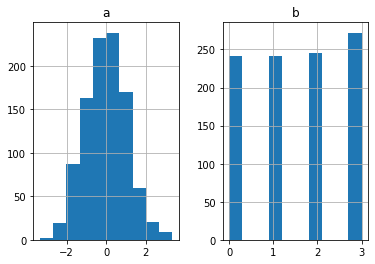

In [55]:
data.hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

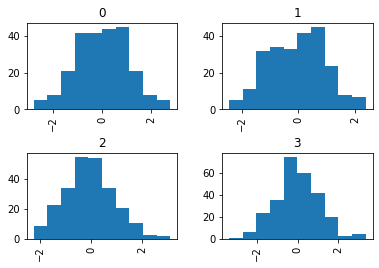

In [84]:
data['a'].hist(by=data['b'],figsize=(6,4)) # b컬럼의 값에 따라 히스토그램 그리기  (위에서 쓴 코드와 같은 의미)

## 6.파이썬 시각화 상자 수염 그림(box plot) 그리기

In [74]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,0.033511,0.291076,0.625673,0.537552,0.875873
1,0.038634,0.335005,0.542214,0.248378,0.938373
2,0.507602,0.117915,0.224394,0.980689,0.664915
3,0.996329,0.243699,0.276422,0.309123,0.753087
4,0.877628,0.155363,0.948967,0.605045,0.025278
5,0.700143,0.623225,0.136511,0.497860,0.574849
6,0.612359,0.418458,0.599471,0.318091,0.776139
7,0.043935,0.874420,0.213082,0.666767,0.443814
8,0.877108,0.048233,0.418664,0.901968,0.181760
9,0.726954,0.912002,0.740368,0.003378,0.191357


In [57]:
np.random.rand(10, 5)

array([[0.37743718, 0.63095112, 0.33936231, 0.10934339, 0.84669839],
       [0.93997216, 0.34389041, 0.03977189, 0.57814562, 0.1028432 ],
       [0.27945858, 0.61715395, 0.67060849, 0.64603404, 0.96832575],
       [0.50755513, 0.4095059 , 0.39145855, 0.02378191, 0.35516543],
       [0.76157813, 0.85962236, 0.4087469 , 0.36358524, 0.04777507],
       [0.15625315, 0.34790579, 0.92140342, 0.34629229, 0.4184877 ],
       [0.48024229, 0.66564022, 0.94815397, 0.41257207, 0.45546953],
       [0.08479035, 0.2968596 , 0.52374516, 0.984858  , 0.75152411],
       [0.16518324, 0.96640545, 0.69905956, 0.1121055 , 0.62781671],
       [0.67546609, 0.29571443, 0.05665186, 0.80324239, 0.82222686]])

In [60]:
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.402455,0.497603,0.432707,0.476218,0.673004
std,0.286345,0.267574,0.309858,0.245876,0.228544
min,0.080355,0.086897,0.069748,0.034910,0.371041
25%,0.143962,0.332222,0.195317,0.337417,0.502857
50%,0.365066,0.484073,0.322071,0.529602,0.637492
75%,0.610834,0.637315,0.667007,0.576615,0.883992
max,0.941475,0.932769,0.943414,0.859460,0.991451


<AxesSubplot:>

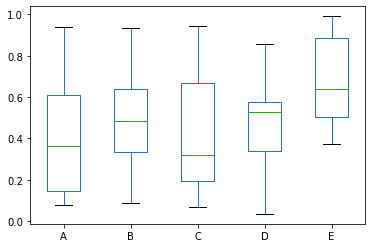

In [62]:
df.plot.box()

<AxesSubplot:>

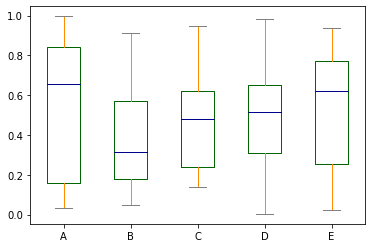

In [75]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}


df.plot.box(color=color, sym='r+') # sym : symbol 모양

<AxesSubplot:>

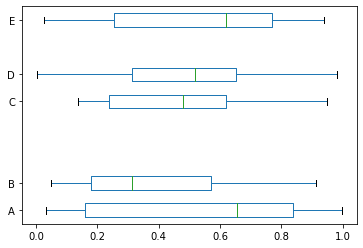

In [77]:
df.plot.box(vert=False, positions=[1, 2, 5, 6, 8]) # vert = False : 상자그림 가로로, position : 사용자 지정 위치 상자플롯

In [78]:
df = pd.DataFrame(np.random.randn(10, 5))
df

,0,1,2,3,4
0,0.776758,-0.460444,1.123014,-0.960470,1.251917
1,1.282012,-0.410112,-0.207690,-1.764345,0.017986
2,0.007471,0.406416,0.665505,1.114820,1.653956
3,1.255476,-0.827127,0.825409,2.029046,-0.286779
4,0.192582,-0.642077,-0.152098,0.658777,-1.157888
5,1.240944,1.234798,1.544941,0.838361,0.936663
6,0.178783,0.361397,-1.742126,-0.198643,-0.059833
7,-0.010085,-0.482539,0.104685,0.094066,-0.778023
8,-1.272005,0.399636,-0.152079,-1.626979,0.299046
9,0.248780,-2.504128,0.548610,-0.187851,0.301698


<AxesSubplot:>

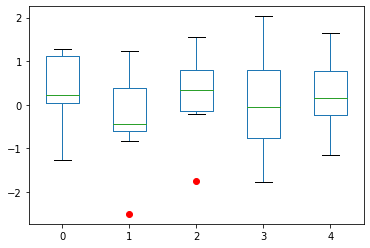

In [81]:
df.plot.box(sym = 'ro')

In [90]:
plt.figure() # 새로운 figure 생성

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

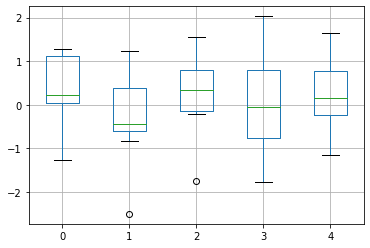

In [91]:
df.boxplot()

In [92]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])

df.head()

,Col1,Col2
0,0.771362,0.244657
1,0.747589,0.341609
2,0.544008,0.392658
3,0.051059,0.713859
4,0.619909,0.375311


In [97]:
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
df

,Col1,Col2,X
0,0.771362,0.244657,A
1,0.747589,0.341609,A
2,0.544008,0.392658,A
3,0.051059,0.713859,A
4,0.619909,0.375311,A
5,0.043776,0.968803,B
6,0.156919,0.006433,B
7,0.689526,0.208908,B
8,0.099185,0.742022,B
9,0.195887,0.288295,B


<Figure size 432x288 with 0 Axes>

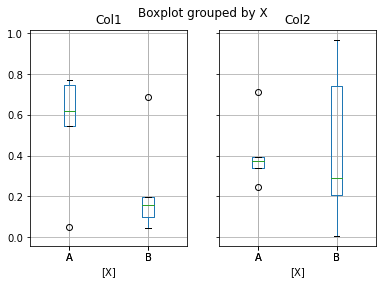

In [98]:
plt.figure(); 
bp = df.boxplot(by='X') # X값에 따른 상자그림

<Figure size 432x288 with 0 Axes>

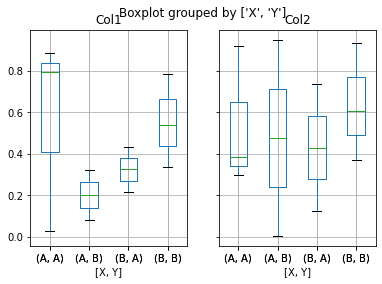

In [101]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'])

plt.figure();

bp = df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])

In [107]:
np.random.seed(1234)

df_box = pd.DataFrame(np.random.randn(50, 2))

df_box['g'] = np.random.choice(['A', 'B'], size=50) # 배열['A', 'B']로부터 임의표본 50개 추출
df_box.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,0.887163,B
3,0.859588,-0.636524,A
4,0.015696,-2.242685,B


In [108]:
df_box.loc[df_box['g'] == 'B', 1] += 3 # g컬럼값이 'B'인 행에서 index명이 1인 값에 3을 더해준다.
df_box.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


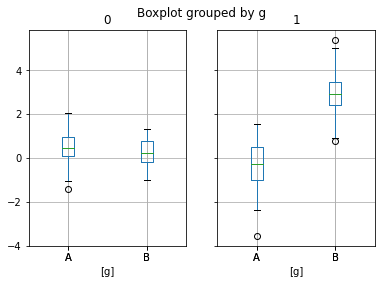

In [112]:
bp = df_box.boxplot(by='g') # g컬럼 값이 'B'이고 index명이 1인 값이 다른 값들보다 크다.

#### 위 그래프는 먼저 숫자 열로 분할된 다음 g열값으로 분할된다.

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

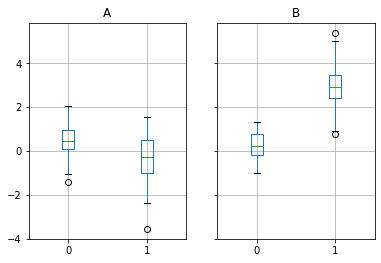

In [116]:
df_box.groupby('g').boxplot()

#### 위 그래프는 먼저 g열값으로 분할된 다음 숫자 열로 분할된다.

## 7. 파이썬 데이터 시각화 Area plot, Grid 옵션으로 그래프 격자 만들기

In [118]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df

,a,b,c,d
0,0.556895,0.084774,0.333002,0.728429
1,0.142435,0.552469,0.273043,0.974495
2,0.667787,0.255653,0.108311,0.776181
3,0.782478,0.761604,0.914403,0.658623
4,0.568368,0.201756,0.698296,0.952195
5,0.889963,0.993567,0.818704,0.545122
6,0.451254,0.890557,0.973265,0.593411
7,0.366074,0.323095,0.871423,0.215634
8,0.734945,0.365619,0.801603,0.782736
9,0.701355,0.622777,0.493683,0.840538


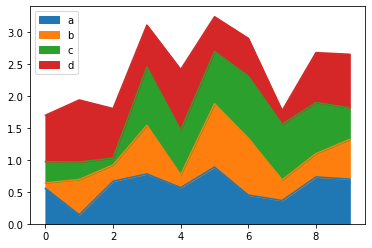

In [124]:
df.plot.area();

#### nan 값이 있다면 자동으로 0으로 처리한다. 
#### 값을 누적 시켜주는게 기본 옵션이다.
#### area() 는 영역 그림을 그리는것

<AxesSubplot:>

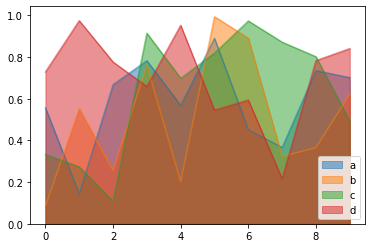

In [125]:
df.plot.area(stacked=False)

<AxesSubplot:>

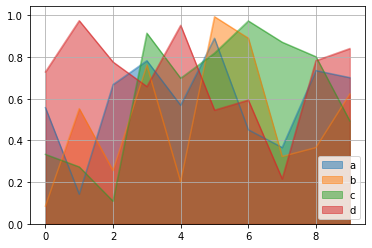

In [126]:
df.plot.area(stacked=False,grid=True) # grid = True : 격자무늬 생성

## 8. 파이썬 데이터 시각화 scatter plot, 산점도 그리기
* DataFrame.plot.scatter()을 사용하면 산점도를 그릴 수 있다.
* x와 y의 축을 꼭 지정해주어야한다.
* s= 30 으로 점의 사이즈를 조정할 수 있다.

In [128]:
df = pd.DataFrame(np.random.randn(50, 4), columns=['a', 'b', 'c', 'd'])


<AxesSubplot:xlabel='a', ylabel='b'>

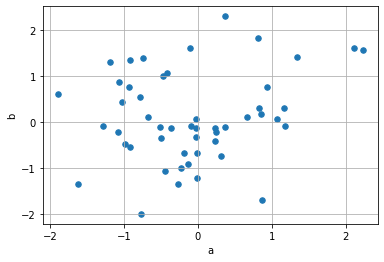

In [129]:
df.plot.scatter(x='a', y='b',s=30,grid=True)

<AxesSubplot:xlabel='c', ylabel='d'>

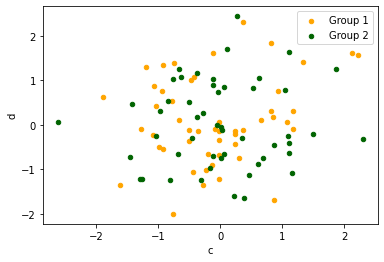

In [136]:
# group나눠서 scatter plot 그리기
ax = df.plot.scatter(x='a', y='b', color='orange', label='Group 1')
    
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

<AxesSubplot:xlabel='a', ylabel='b'>

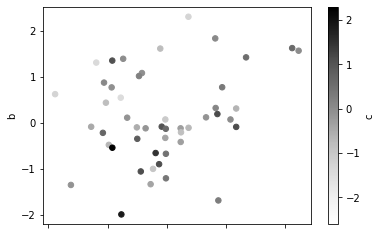

In [137]:
# 3개의 축으로 나타내기
df.plot.scatter(x='a', y='b', c='c', s=30)

<AxesSubplot:xlabel='a', ylabel='b'>

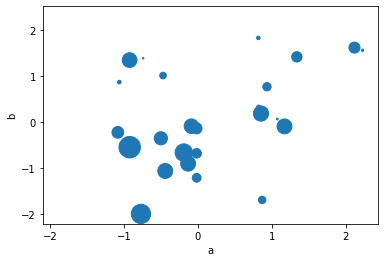

In [141]:
# c의 값에 따라 점의 크기가 다르다.
df.plot.scatter(x='a', y='b', s=df['c'] * 200)

## 9. 파이썬 데이터 시각화 히스토그램과 산점도를 보완한 Hexbin plot 그리기

In [142]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

In [148]:
np.arange(1000)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [149]:
df['b'] = df['b'] + np.arange(1000) 
df

,a,b
0,0.969460,-1.029968
1,-0.785723,-0.815021
2,-0.820341,2.492719
3,2.027267,2.050147
4,-0.210333,4.625148
...,...,...
995,0.227042,995.814365
996,2.035730,996.476133
997,0.466699,996.446729
998,-0.617373,997.235415


<AxesSubplot:xlabel='a', ylabel='b'>

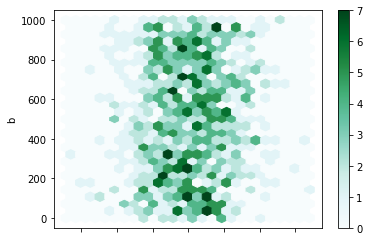

In [150]:
# gridsize : 그리드의 크기 조절
df.plot.hexbin(x='a', y='b', gridsize=25) # 25 * 25

<AxesSubplot:xlabel='a', ylabel='b'>

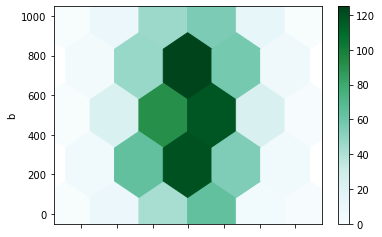

In [152]:
df.plot.hexbin(x='a', y='b', gridsize=5) # 5*5

#### 많이 밀집된 곳일 수록 색상이 진하다.

<AxesSubplot:xlabel='a', ylabel='b'>

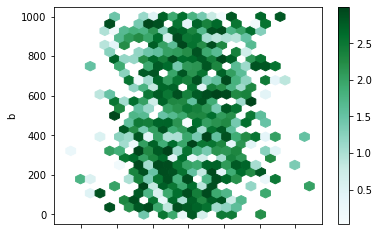

In [153]:
df['z'] = np.random.uniform(0, 3, 1000) # 0~3사이의 uniform dstn에서 랜덤으로 값을 1000개 뽑는다.
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

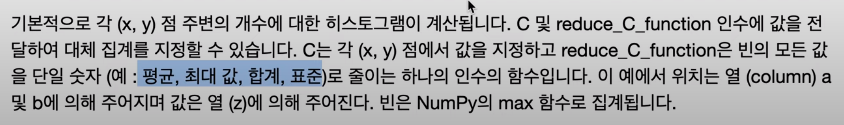

In [155]:
 from IPython.display import Image
 
Image(r"C:\Users\jinseul\Desktop\reduce_C.png")
# reduce_C_function의 의미

## 10. 원그래프

In [157]:
series = pd.Series(3 * np.random.randn(4), index = ['a', 'b', 'c', 'd'], name = "series")
series

a    0.361371
b    0.760931
c   -3.867877
d   -4.513679
Name: series, dtype: float64

In [158]:
series.plot.pie(figsize=(6, 6)) # 데이터에 음수가 있으므로 오류 발생

ValueError: None doesn't allow negative values

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

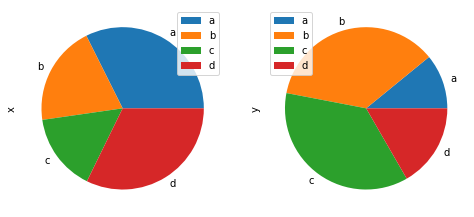

In [201]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index = ['a', 'b', 'c', 'd'], columns = ['x', 'y'])
df.plot.pie(subplots = True, figsize=(8, 4))

#### 10 - 1) matplotlib을 이용하여 파이차트 그리기

([<matplotlib.patches.Wedge at 0x242abc31fd0>,
 [Text(0.9123462485674189, 0.6145114504425102, ''),
  Text(-0.7892580098194788, 0.7662061040841398, ''),
  Text(-0.2899458620567297, -1.0610991457334136, ''),
  Text(0.9123462485674185, -0.6145114504425107, ''),
  Text(1.0922792053850405, -0.13010048994306064, '')])

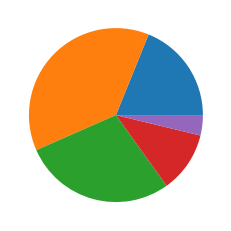

In [176]:
data = [500, 1000, 750, 300, 100]
plt.pie(data)

([<matplotlib.patches.Wedge at 0x242ab72e400>,
 [Text(0.9123462485674189, 0.6145114504425102, 'marketing'),
  Text(-0.7892580098194788, 0.7662061040841398, 'payroll'),
  Text(-0.2899458620567297, -1.0610991457334136, 'engineering'),
  Text(0.9123462485674185, -0.6145114504425107, 'design'),
  Text(1.0922792053850405, -0.13010048994306064, 'misc')])

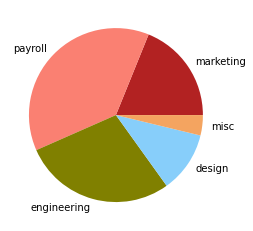

In [184]:
categories=['marketing', 'payroll', 'engineering', 'design', 'misc']
colors = ['firebrick', 'salmon', 'olive', 'lightskyblue', 'sandybrown']
plt.pie(data, colors = colors, labels = categories)

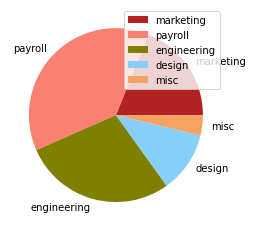

In [190]:
# 범주 달기 : plt.legend
plt.pie(data, colors = colors, labels = categories)
plt.legend(categories, loc = 'upper right') # loc : 위치 지정

([<matplotlib.patches.Wedge at 0x242abac1ca0>,
 [Text(0.9123462485674189, 0.6145114504425102, 'marketing'),
  Text(-0.7892580098194788, 0.7662061040841398, 'payroll'),
  Text(-0.2899458620567297, -1.0610991457334136, 'engineering'),
  Text(0.9123462485674185, -0.6145114504425107, 'design'),
  Text(1.0922792053850405, -0.13010048994306064, 'misc')],
 [Text(0.49764340830950116, 0.3351880638777328, '+18.87%'),
  Text(-0.430504368992443, 0.41793060222771256, '+37.74%'),
  Text(-0.1581522883945798, -0.5787813522182255, '+28.30%'),
  Text(0.49764340830950093, -0.3351880638777331, '+11.32%'),
  Text(0.5957886574827493, -0.0709639036053058, '+3.77%')])

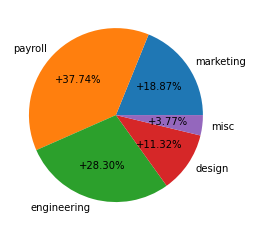

In [193]:
# 값 표시 : autopct
plt.pie(data, labels=categories, autopct='%0.2f%%')

<ipython-input-197-5e1012f911be>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(series, autopct='%0.1f%%')


([<matplotlib.patches.Wedge at 0x242b05b27c0>,
 [Text(1.0461621663333946, 0.3399186987098808, ''),
  Text(0.6465637650236903, 0.8899187028927925, ''),
  Text(-2.5747358111484753e-08, 1.0999999999999999, ''),
  Text(-0.6465638066837905, 0.8899186726249574, '')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(0.35267114455837645, 0.4854102015778868, '10.0%'),
  Text(-1.4044013515355319e-08, 0.5999999999999999, '10.0%'),
  Text(-0.35267116728206754, 0.48541018506815853, '10.0%')])

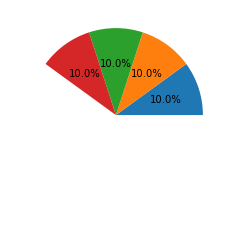

In [197]:
series = pd.Series([0.1, 0.1, 0.1, 0.1]) # 합계가 1.0 미만이면 반원을 그리게 된다.
plt.pie(series, autopct='%0.1f%%')